## prototipo 1 de la publicación

En el siguiente flujo de trabajo, vamos a realizar un Machine Learning basados en un Base data extraido de la siguiente pagina https://www.data.bsee.gov/Main/GandG.aspx. Esta base, recopila todos los datos generados por perforaciones en las costas del golfo de Mexico alfrente de EEUU. Cabe aclara que, esta base se enfoca en las arenas presentes en los yacimientos y todos los datos recopilados de estas.

### Step 1 

importamos todo lo que vamos a necesitar preliminarmente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### Step 2 

Con la libreria pandas leemos, observamos la forma de la data.

In [2]:
df=pd.read_excel('e://piere/documentos/Portafolio/Oil Play Prediction/Data/RAW/2019 Atlas Update.xlsx')

In [3]:
df.columns

Index(['SN_FORMSAND', 'SAND_NAME', 'ASSESSED', 'SDDATE', 'SDYEAR', 'SDDATEH',
       'SDYEARH', 'WELLAPI', 'BOEM_FIELD', 'FCLASS', 'FSTAT', 'FSTRUC',
       'FTRAP1', 'FTRAP2', 'FDDATE', 'FDYEAR', 'EIAID', 'PLAREA', 'SAND',
       'PLAY_NUM', 'PLAY_NAME', 'POOL_NAME', 'CHRONOZONE', 'PLAY_TYPE',
       'SD_TYPE', 'WDEP', 'Original Oil', 'Original Gas', 'Original BOE',
       'Cum Oil', 'Cum Gas', 'Cum BOE', 'Oil Reserves', 'Gas Reserves',
       'BOE Reserves', 'SS', 'THK', 'TAREA', 'TVOL', 'OTHK', 'OAREA', 'OVOL',
       'GTHK', 'GAREA', 'GVOL', 'DRIVE', 'RESTYP', 'POROSITY', 'SW',
       'PERMEABILITY', 'Pi', 'TI', 'SDPG', 'SDTG', 'RSI', 'YIELD', 'PROP',
       'GOR', 'SPGR', 'API', 'BGI', 'BOI', 'RECO_AF', 'RECG_AF', 'OIP', 'GIP',
       'ORF', 'ORECO', 'ORECG', 'ORP', 'GRF', 'GRECO', 'GRECG', 'GRP', 'NCNT',
       'UCNT', 'SCNT', 'TCNT', 'BHCOMP', 'LAT', 'LONG'],
      dtype='object')

In [4]:
df.shape

(13394, 81)

hemos observado que contine 13302 filas y 81 columnas la cuales en el siguiente paso, extraemos las que consideramos mas importes y las que son cuantitativas.

### Step 3

En este paso concatenaremos en otro DataFrame lo anteriormente indicado. Es decir, extraeremos las variables cualitativas mas faciles de obtener en perforación y/o producción. 

In [5]:
data=pd.concat([df["THK"],df["WDEP"],df["TVOL"],df["TAREA"],df["Pi"],df["POROSITY"],df["SW"],df["PERMEABILITY"],df["TI"],df["SS"]],axis=1)

In [6]:
data.shape

(13394, 10)

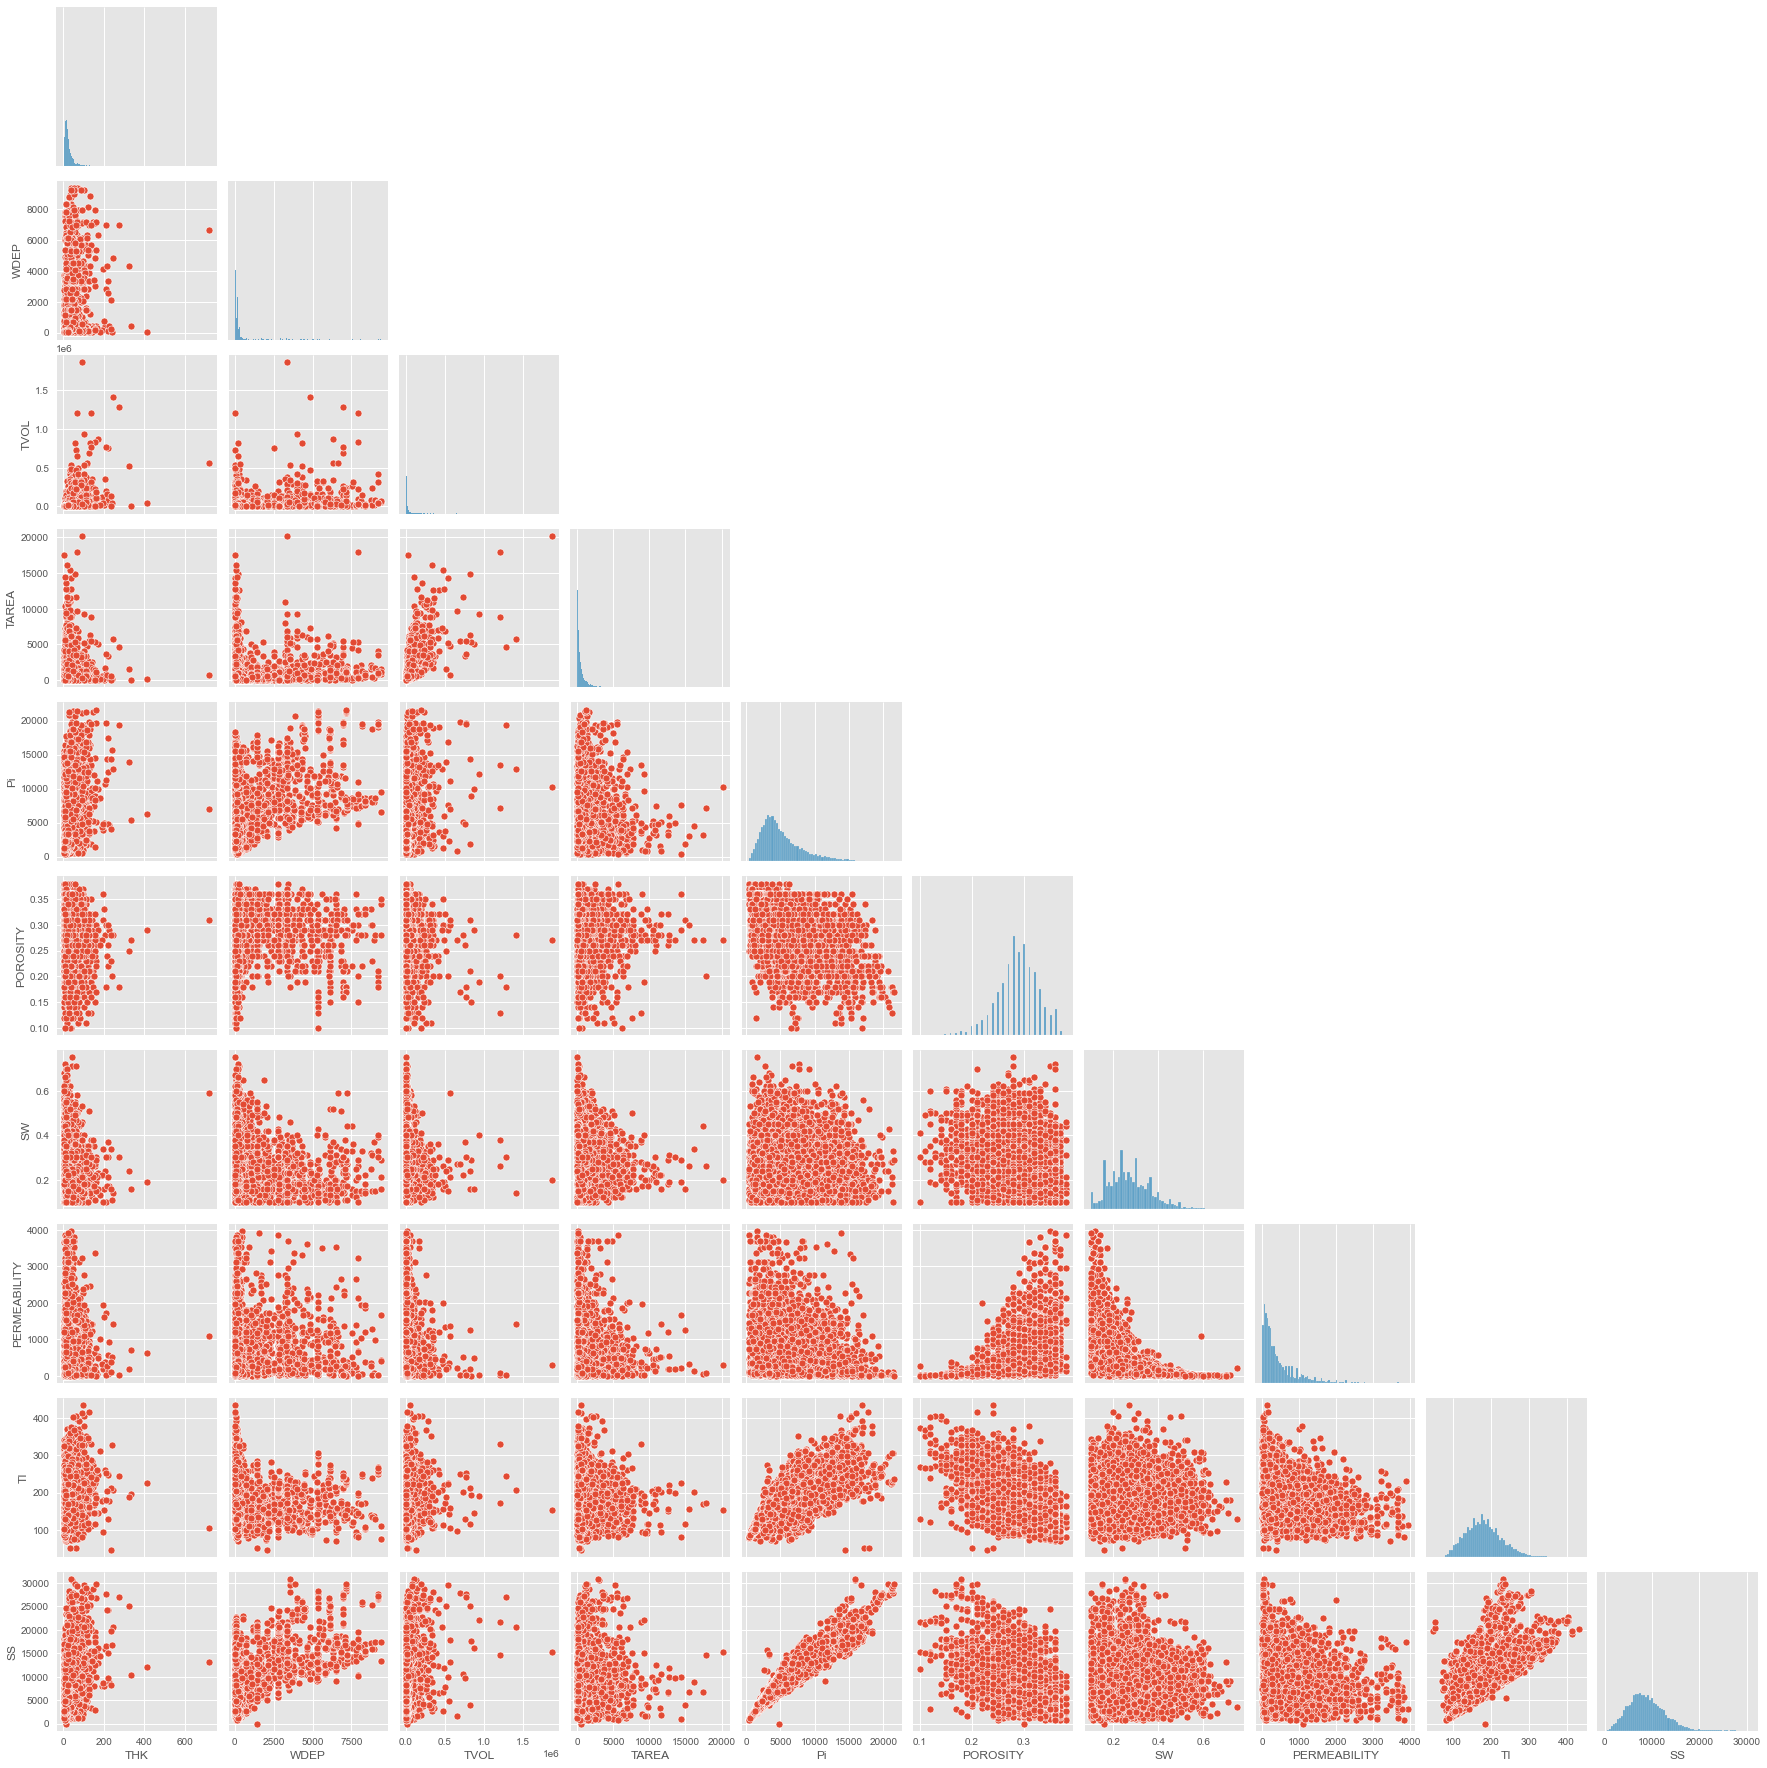

In [76]:
sns.pairplot(data=data,corner=True)

In [8]:
corre=data.corr()


<AxesSubplot:>

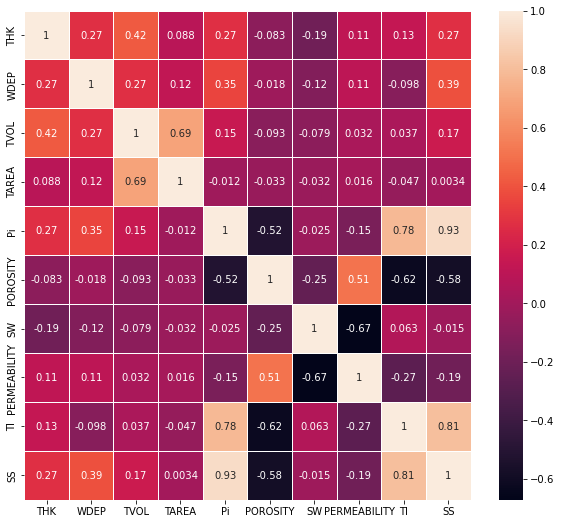

In [9]:
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(corre, vmax=1, square=False,annot=True,linewidths=.5,linecolor="w")

In [10]:
data.isnull().sum()

THK              0
WDEP             0
TVOL             0
TAREA            0
Pi               0
POROSITY         0
SW               0
PERMEABILITY    92
TI               0
SS               0
dtype: int64

In [11]:
permeability_nan=data[data["PERMEABILITY"].isnull()].index.tolist()

In [12]:
data=data.drop(permeability_nan,axis=0)
df=df.drop(permeability_nan,axis=0)

In [36]:
data.dtypes

THK             float64
WDEP              int64
TVOL              int64
TAREA             int64
Pi                int64
POROSITY        float64
SW              float64
PERMEABILITY    float64
TI              float64
SS                int64
dtype: object

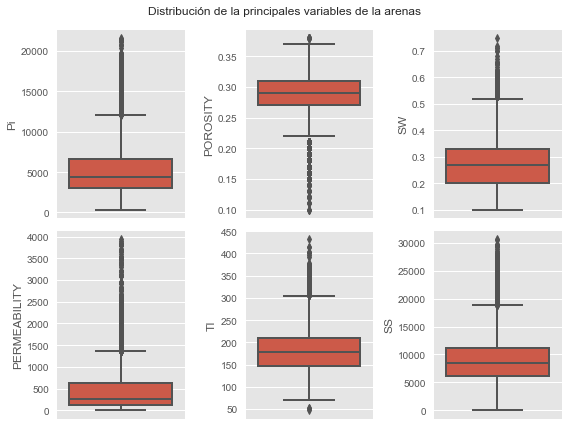

In [75]:

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(8,6))
ax[0,0]=sns.boxplot(data=data,y="Pi",ax=ax[0,0])
ax[0,1]=sns.boxplot(data=data,y="POROSITY",ax=ax[0,1])
ax[0,2]=sns.boxplot(data=data,y="SW",ax=ax[0,2])
ax[1,0]=sns.boxplot(data=data,y="PERMEABILITY",ax=ax[1,0])
ax[1,1]=sns.boxplot(data=data,y="TI",ax=ax[1,1])
ax[1,2]=sns.boxplot(data=data,y="SS",ax=ax[1,2])
fig.suptitle("Distribución de la principales variables de la arenas")
plt.tight_layout()
    

Como podemos observar en la matriz de correlaciones, y las distribuciones matemáticas de las principales variables de las arenas en el golfo de México. Podemos evidenciar, que entre todas las variables existen una relación como ya es conocida a nivel académico y como estas nos pueden contribuir a desarrollar un buen modelo de clasificación. 

### step 4

realizaremos la grafica de los datos para observar donde nos ubicamos y a cual es el taget al cual queremos llegar

In [81]:
import plotly.express as px

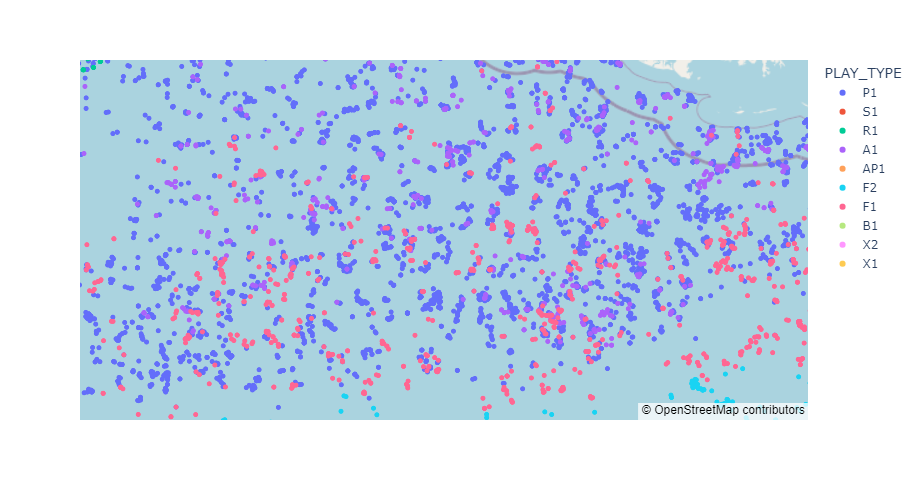

In [117]:
fig=px.scatter_mapbox(df,lat=df.LAT,lon=df.LONG,color='PLAY_TYPE',width=800,height=500)
fig.update_layout(mapbox_style="open-street-map")

In [120]:
Ptypes_value=pd.DataFrame(df["PLAY_TYPE"].value_counts())

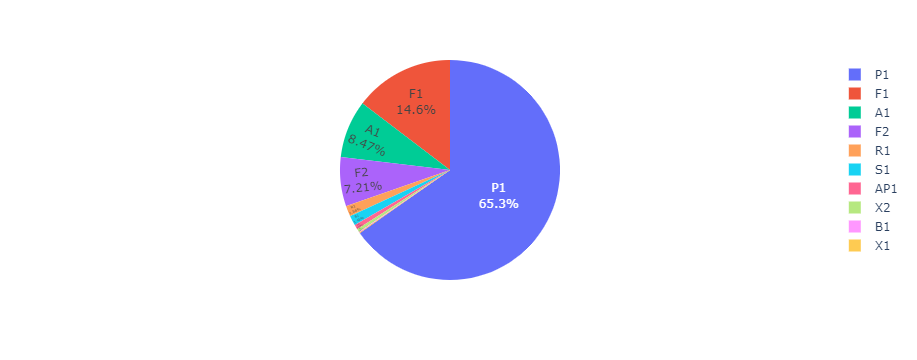

In [128]:
fig=px.pie(Ptypes_value,values='PLAY_TYPE',names=Ptypes_value.index)
fig.update_traces(textposition='inside', textinfo='percent+label')

### Step 5

 #### Ya entramos en nuestros modelos de Machine Learning

***vamos enfocar el machine learning en modelos de clasificación aprovechando la data obetenida para predicir categorias.***

Vamos a utilizar los clasificadores como los árboles. Vamos a iniciar con un árbol de decisión sencillo, luego pasamos por los métodos de ensamble como el RandomForest y terminamos con un AdaBoost.

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [168]:
def report(y_true,y_pred):
    print(classification_report(y_true,y_pred))
def matrix(y_true,y_pred):
    g=confusion_matrix(y_true,y_pred)
    sns.heatmap(data=g,xticklabels=Ptypes_value.index.sort_values(),yticklabels=Ptypes_value.index.sort_values(),cbar=False,annot=True,cmap="Blues",fmt="g")
    

# Tree 

In [131]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [130]:
X_train,X_test,y_train,y_test=train_test_split(data,df.PLAY_TYPE,random_state=42)

In [132]:
clf=tree.DecisionTreeClassifier()

In [133]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [135]:
y_pred=clf.predict(X_test)

In [170]:
report(y_test,y_pred)

              precision    recall  f1-score   support

          A1       0.44      0.51      0.47       265
         AP1       0.20      0.21      0.21        19
          B1       0.75      1.00      0.86         3
          F1       0.60      0.66      0.63       466
          F2       0.96      0.94      0.95       236
          P1       0.85      0.81      0.83      2219
          R1       0.12      0.14      0.13        51
          S1       0.29      0.38      0.33        42
          X1       0.50      0.43      0.46         7
          X2       0.59      0.72      0.65        18

    accuracy                           0.75      3326
   macro avg       0.53      0.58      0.55      3326
weighted avg       0.77      0.75      0.76      3326



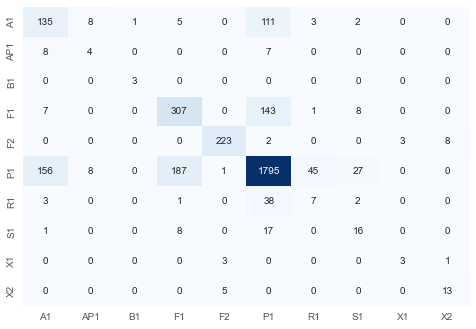

In [169]:
matrix(y_test,y_pred)

# RandomForestClassifier

In [171]:
from sklearn.ensemble import RandomForestClassifier


In [172]:
clf=RandomForestClassifier()

In [173]:
clf.fit(X_train,y_train)
y_pred_r=clf.predict(X_test)

In [174]:
report(y_test,y_pred_r)

              precision    recall  f1-score   support

          A1       0.66      0.44      0.52       265
         AP1       0.33      0.11      0.16        19
          B1       1.00      1.00      1.00         3
          F1       0.80      0.61      0.69       466
          F2       0.94      1.00      0.97       236
          P1       0.84      0.95      0.89      2219
          R1       1.00      0.04      0.08        51
          S1       1.00      0.12      0.21        42
          X1       1.00      0.14      0.25         7
          X2       0.80      0.44      0.57        18

    accuracy                           0.83      3326
   macro avg       0.84      0.48      0.53      3326
weighted avg       0.83      0.83      0.81      3326



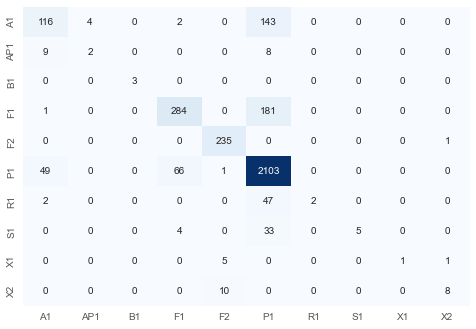

In [175]:
matrix(y_test,y_pred_r)

# AdaBoostClassifier

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
clf=AdaBoostClassifier()

In [180]:
clf.fit(X_train,y_train)
y_pred_a=clf.predict(X_test)

In [181]:
report(y_test,y_pred_a)

              precision    recall  f1-score   support

          A1       0.00      0.00      0.00       265
         AP1       0.05      0.68      0.09        19
          B1       0.00      0.00      0.00         3
          F1       0.00      0.00      0.00       466
          F2       0.00      0.00      0.00       236
          P1       0.67      0.92      0.78      2219
          R1       0.00      0.00      0.00        51
          S1       0.00      0.00      0.00        42
          X1       0.00      0.00      0.00         7
          X2       0.00      0.00      0.00        18

    accuracy                           0.62      3326
   macro avg       0.07      0.16      0.09      3326
weighted avg       0.45      0.62      0.52      3326



C:\Users\piere\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\piere\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\piere\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



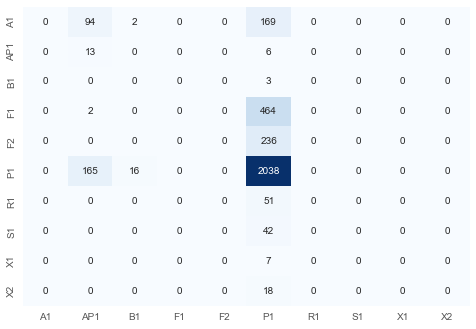

In [182]:
matrix(y_test,y_pred_a)

In [11]:
from sklearn.model_selection import KFold

In [12]:
kfold=KFold(n_splits=10,random_state=0,shuffle=True)

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
evaluciones=cross_val_score(estimator=knn,X=data1,y=df["PLAY_TYPE"],cv=kfold)

In [15]:
print(f'{evaluciones.mean():.2%}')

75.91%


In [16]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
estimadores={'KNeighborsClassifier':knn,'SVC':SVC(gamma='scale'),'GaussianNB':GaussianNB()}

In [18]:
for estimador_name, estimador_object in estimadores.items():
    kfold=KFold(n_splits=5,random_state=0,shuffle=True)
    evaluciones=cross_val_score(estimator=estimador_object,X=data1,y=df["PLAY_TYPE"],cv=kfold)
    print(f'{estimador_name:>10} '+f'Precisión promedio={evaluciones.mean():0.2%} '+f'desviacion estandar{evaluciones.std():0.2%}')

KNeighborsClassifier Precisión promedio=75.42% desviacion estandar0.82%
       SVC Precisión promedio=73.33% desviacion estandar0.35%
GaussianNB Precisión promedio=70.79% desviacion estandar0.74%


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [56]:
clf = DecisionTreeClassifier(random_state=0)

In [57]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
print(f'{clf.score(X_test,y_test):.2%}')

75.35%


#### Ahora vamos con otro metodo de decisiones


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
clfa = RandomForestClassifier(random_state=20,n_estimators=800)

In [52]:
clfa.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800, random_state=20)

In [60]:
print(f'{clfa.score(X_test,y_test):.2%}')

81.78%


In [63]:
pronostico=clfa.predict(X=X_test)

In [75]:
f1_score(y_test,pronostico, average='weighted')

0.7975515261934444

<AxesSubplot:>

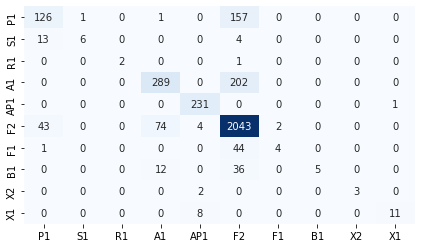

In [107]:
plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix(y_test,pronostico),cmap='Blues',annot=True,xticklabels=targets,yticklabels=targets,cbar=False,fmt='g')

In [91]:
targets=df["PLAY_TYPE"].unique()

In [93]:
print(classification_report(y_test,pronostico,target_names=targets))

              precision    recall  f1-score   support

          P1       0.69      0.44      0.54       285
          S1       0.86      0.26      0.40        23
          R1       1.00      0.67      0.80         3
          A1       0.77      0.59      0.67       491
         AP1       0.94      1.00      0.97       232
          F2       0.82      0.94      0.88      2166
          F1       0.67      0.08      0.15        49
          B1       1.00      0.09      0.17        53
          X2       1.00      0.60      0.75         5
          X1       0.92      0.58      0.71        19

    accuracy                           0.82      3326
   macro avg       0.87      0.53      0.60      3326
weighted avg       0.81      0.82      0.80      3326



In [28]:
esperado=y_test

In [29]:
errores=[(p,e) for (p,e) in zip (pronostico,esperado) if p!=e]

In [30]:
err=pd.DataFrame(errores)

In [31]:
err.columns=["Pronostico","Esperado"]

In [32]:
err.groupby("Esperado")["Pronostico"].unique()


Esperado
A1         [P1, AP1, F1, R1]
AP1                 [A1, P1]
B1                  [F1, P1]
F1                  [P1, A1]
F2              [P1, X1, X2]
P1     [A1, F1, R1, AP1, F2]
R1                  [P1, A1]
S1                  [P1, F1]
X2                      [F2]
Name: Pronostico, dtype: object

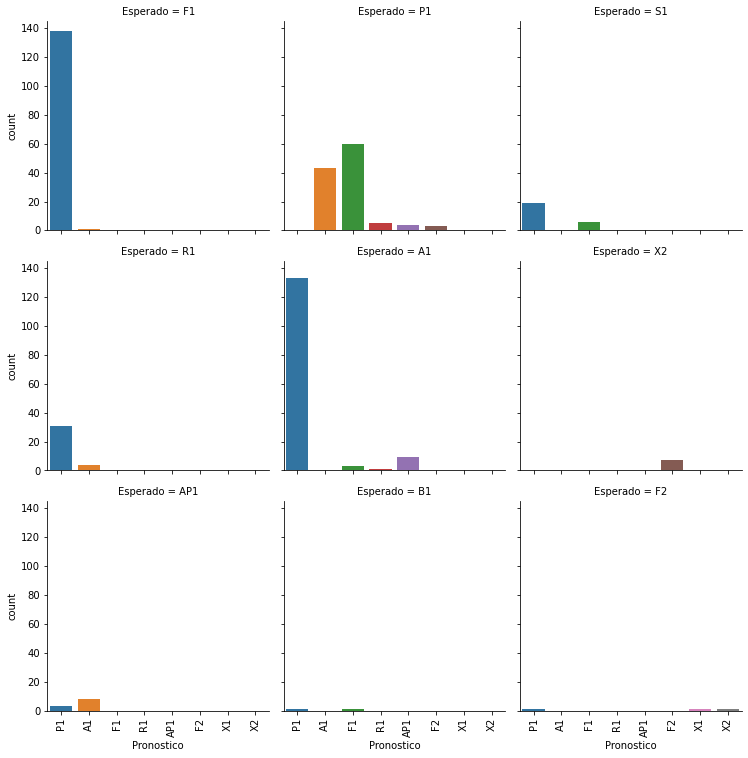

In [33]:
g = sns.catplot(x="Pronostico", col="Esperado",kind="count", data=err, height=3.5,col_wrap=3)
g.set_xticklabels(rotation=90)

In [34]:
z=1
while z==1:
    if z==1:
        WDEP=float(input("Ingrese el valor de la profundidad de agua: "))
        SS=float(input("Ingrese el valor de profundida bajo el nivel del mar: "))
        PI=float(input("Ingrese el valor de la presion inicial: "))
        TI=float(input("Ingrese el valor de la temperatura inicial: "))
        TF=np.array([WDEP,PI,TI,SS]).reshape(1,-1)
        pred=clfa.predict(X=TF)
        print(f'El potencial play que puedes obtenes es: {pred}')
    else: 
        break
    z=float(input("Ingrese\n1 si desea contuniar\ningrese otro numero si quiere finalizar:\n "))    

Ingrese el valor de la profundidad de agua:  51
Ingrese el valor de profundida bajo el nivel del mar:  21500
Ingrese el valor de la presion inicial:  15065
Ingrese el valor de la temperatura inicial:  397


El potencial play que puedes obtenes es: ['A1']


Ingrese
1 si desea contuniar
ingrese otro numero si quiere finalizar:
  4


In [44]:
from sklearn.ensemble import VotingClassifier

In [45]:
clf3 = ExtraTreesClassifier(n_estimators=1000, random_state=0)

NameError: name 'ExtraTreesClassifier' is not defined

In [55]:
clf3.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=0)

In [56]:
print(f'{clf3.score(X_test,y_test):.2%}')

85.42%


In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
clfe = AdaBoostClassifier(n_estimators=1000)

In [48]:
clfe.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [49]:
print(f'{clfe.score(X_test,y_test):.2%}')

66.60%


### vamos con la regresion neuronal para ver si nos ayuda 

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
clf1 = MLPClassifier(random_state=50)

In [52]:
clf1.fit(X_train,y_train)

MLPClassifier(random_state=50)

In [53]:
print(f'{clf1.score(X_test,y_test):.2%}')

53.85%


### ridgeCV

In [54]:
from sklearn.linear_model import RidgeClassifier

In [55]:
clf5 = RidgeClassifier()

In [56]:
clf5.fit(X_train,y_train)

RidgeClassifier()

In [57]:
print(f'{clf5.score(X_test,y_test):.2%}')

72.10%


### conclusion 

Hemos desarrollado una maquina inteligente capaz de predecir el tipo de trampa petrolifera que tenemos, utilizando datos como profundidad del agua, presion inicial, temperatura inicial, saturación de agua y profundidad. Con una exactitud maxima del 84.91%